In [1]:
# required for jupyter notebook
%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import math

In [2]:
aestheticScores_df = pd.read_csv('..'+os.sep+'dataset'+os.sep+'BanglaLekha-Isolated'+os.sep+'aesthetic-scores.csv')

In [3]:
aestheticScores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Form No                2000 non-null   int64  
 1   Out Of 5 (1st Person)  2000 non-null   int64  
 2   Out of 5 (2nd Person)  2000 non-null   int64  
 3   Out of 5 (3rd Person)  2000 non-null   int64  
 4   Average                2000 non-null   float64
dtypes: float64(1), int64(4)
memory usage: 78.2 KB


In [4]:
aestheticScores_df.head()

,Form No,Out Of 5 (1st Person),Out of 5 (2nd Person),Out of 5 (3rd Person),Average
0,1,2,4,5,3.666667
1,2,1,3,4,2.666667
2,3,3,5,4,4.000000
3,4,2,3,4,3.000000
4,5,1,3,3,2.333333


In [5]:
aestheticScores_df = aestheticScores_df.round(decimals=3)
aestheticScores_df['Average'].head()

0    3.667
1    2.667
2    4.000
3    3.000
4    2.333
Name: Average, dtype: float64

In [6]:
aestheticScores_df['Average'].value_counts()

1.000    266
3.000    219
2.000    217
2.667    199
2.333    194
1.667    185
1.333    185
3.333    181
3.667    155
4.000    107
4.333     57
4.667     26
5.000      9
Name: Average, dtype: int64

  
  ### Ignore the codes below (starting here)

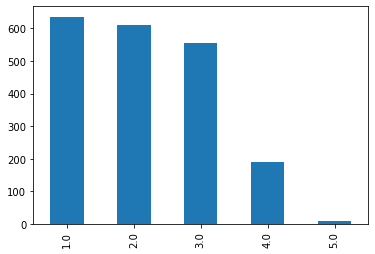

In [7]:
uniq_score_freq = aestheticScores_df['Average'].apply(np.floor).value_counts()
uniq_score_freq.sort_values(ascending=False).plot.bar()
plt.show()

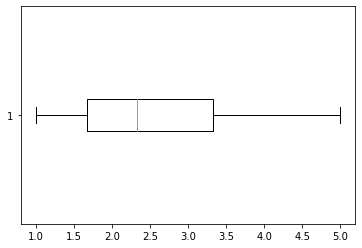

In [8]:
plt.boxplot(aestheticScores_df['Average'], vert=0)
plt.show()

In [9]:
good_cnt = 0
bad_cnt = 0
for avg in aestheticScores_df['Average']:
    if avg>=2.5:
        good_cnt+=1
    else:
        bad_cnt+=1

In [10]:
good_cnt

953

In [11]:
bad_cnt

1047

In [12]:
total_cnt = good_cnt + bad_cnt
print('Good={}%, Bad={}%'.format(good_cnt*100/total_cnt, bad_cnt*100/total_cnt,))

Good=47.65%, Bad=52.35%


### Ignore the codes above (ending here)  


  
## Not all of the 2000 forms contain 84 handwriting images. There are some missing data.   


In [10]:
def get_formWise_imageFreq(begin=1, end=84):

    images_dir = os.path.join('..', 'dataset', 'BanglaLekha-Isolated', 'Images')
    form_freqs = {}
    for i in range(begin, end+1):
        curr_dir = os.path.join(images_dir, str(i))
        for file_name in os.listdir(curr_dir): 
            if os.path.isfile(os.path.join(curr_dir, file_name)):
                form_id = int(file_name.split('_')[5])
                if form_id not in form_freqs:
                    form_freqs[form_id] = 0
                form_freqs[form_id]+=1
                
    return dict(sorted(form_freqs.items()))

In [11]:
all_form_freqs = get_formWise_imageFreq()

In [12]:
len(all_form_freqs)

1989

In [13]:
#all_form_freqs

In [14]:
def get_form_aesScores():
    
    form_aesScores = {} 
    
    form_ids = []
    aes_scores = []
    for form_id in aestheticScores_df['Form No']:
        form_ids.append(form_id)
    for aes_score in aestheticScores_df['Average']:
        aes_scores.append(aes_score)
        
    for i in range(len(form_ids)):
        form_aesScores[form_ids[i]] = aes_scores[i]
        
    return form_aesScores

In [15]:
form_aesScores = get_form_aesScores()

In [19]:
#form_aesScores

In [20]:
#aestheticScores_df.head()

In [16]:
def get_aesScoreWise_imageFreq(start=1, end=84):    
    
    form_aesScores = get_form_aesScores()
    form_image_freqs = get_formWise_imageFreq(start, end)
    
    aesScore_image_freq = {}

    for form_id in range(1, 2001):
        if form_id not in form_image_freqs or form_id not in form_aesScores:
            continue

        curr_aesScore = form_aesScores[form_id]
        curr_form_freq = form_image_freqs[form_id]

        if curr_aesScore not in aesScore_image_freq:
            aesScore_image_freq[curr_aesScore] = 0

        aesScore_image_freq[curr_aesScore] += curr_form_freq
        
    return aesScore_image_freq

In [17]:
aesScore_image_freq = get_aesScoreWise_imageFreq()
aesScore_image_freq

{3.667: 12749,
 2.667: 16585,
 4.0: 8899,
 3.0: 18269,
 2.333: 16233,
 4.333: 4699,
 3.333: 15077,
 2.0: 18157,
 1.667: 15461,
 4.667: 2100,
 1.333: 15382,
 5.0: 755,
 1.0: 21739}

In [23]:
#aestheticScores_df['Average'].value_counts()

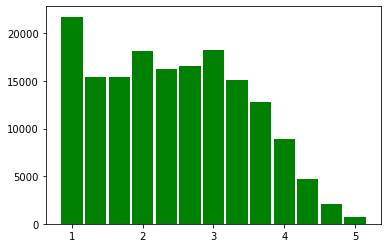

In [18]:
plt.bar(aesScore_image_freq.keys(), aesScore_image_freq.values(), width = 0.3, color='g')
plt.show()

In [19]:
def box_plot_dict(dictonary):
    seq = []
    for(k, v) in dictonary.items():
        while v>0:
            seq.append(k)
            v-=1
        
    plt.boxplot(seq, vert=False)
    plt.show()

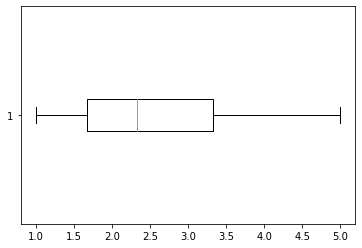

In [20]:
box_plot_dict(aesScore_image_freq)

In [21]:
def bin_classify(form_start=1, form_end=84, score_mean=2.5, score_std=0.0):
    aesScore_image_freq = get_aesScoreWise_imageFreq(form_start, form_end)
    good_cnt = 0
    bad_cnt = 0
    skipped_cnt = 0
    for (aes_score, image_freq) in aesScore_image_freq.items():
        if aes_score>=(score_mean+score_std):
            good_cnt+=image_freq
        elif aes_score<=(score_mean-score_std):
            bad_cnt+=image_freq
        else:
            skipped_cnt+=image_freq

    total_cnt = good_cnt + bad_cnt
    print('Good={}({:.2f}%), Bad={}({:.2f}%)'.format(good_cnt, good_cnt*100/total_cnt, bad_cnt, bad_cnt*100/total_cnt))
    print('skipped=', skipped_cnt)

In [22]:
bin_classify()

Good=79133(47.64%), Bad=86972(52.36%)
skipped= 0


  
## Let's pick the threshold for 'good', 'bad' as the mean of all available scores  
(this makes more logical sense)

In [23]:
def get_mean_aesScore(form_start=1, form_end=84):
    aesScore_image_freq = get_aesScoreWise_imageFreq(form_start, form_end)
    total_score = 0
    total_freq = 0
    for (aes_score, freq) in aesScore_image_freq.items():
        total_score+=(aes_score*freq)
        total_freq+=freq
    
    return total_score / total_freq 

In [24]:
def get_stdDev_aesScore(form_start=1, form_end=84):
    aesScore_image_freq = get_aesScoreWise_imageFreq(form_start, form_end)
    
    aes_scores = []
    
    for (aes_score, freq) in aesScore_image_freq.items():
        while freq > 0:
            aes_scores.append(aes_score)
            freq-=1
    
    return np.std(aes_scores) 

  
## Good, Bad count using mean & stdDev in all the samples  


In [25]:
mean_aesScore = get_mean_aesScore()
stdDev_aesScore = get_stdDev_aesScore()
print("mean = ", mean_aesScore, "stdDev =",stdDev_aesScore)

mean =  2.454930122512869 stdDev = 1.0071517244767565


In [26]:
bin_classify(score_mean=mean_aesScore)

Good=79133(47.64%), Bad=86972(52.36%)
skipped= 0


In [27]:
bin_classify(score_mean=mean_aesScore, score_std=stdDev_aesScore)

Good=29202(44.03%), Bad=37121(55.97%)
skipped= 99782


  
## Good, Bad count using mean & stdDev in only 'sorborno' samples  


In [28]:
# variables for only sorborno 
sorborno_mean_aesScore = get_mean_aesScore(form_start=1, form_end=11)
sorborno_stdDev_aesScore = get_stdDev_aesScore(form_start=1, form_end=11)

In [29]:
print("mean =", sorborno_mean_aesScore, "stdDev =", sorborno_stdDev_aesScore)

mean = 2.4543821787632556 stdDev = 1.0072364551397748


In [30]:
bin_classify(form_start=1, form_end=11, score_mean=sorborno_mean_aesScore)

Good=10372(47.62%), Bad=11411(52.38%)
skipped= 0


In [31]:
bin_classify(form_start=1, form_end=11, score_mean=sorborno_mean_aesScore, score_std=sorborno_stdDev_aesScore)

Good=3828(44.02%), Bad=4869(55.98%)
skipped= 13086


**result is the same but now it makes more sense**